### imports and setup

In [18]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
from exploration import *
from utils import *

### load data

In [21]:
monthly_data, yearly_data = load_dataset()

### explore data

#### examine monthly data

In [23]:
monthly_data

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0


In [24]:
monthly_data[monthly_data.borough_flag == 0].area.unique()

array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorkshire and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

In [25]:
monthly_data[monthly_data.borough_flag == 1].area.unique()

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'hammersmith and fulham',
       'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow',
       'islington', 'kensington and chelsea', 'kingston upon thames',
       'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'waltham forest',
       'wandsworth', 'westminster'], dtype=object)

In [26]:
monthly_data.date.unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [27]:
monthly_data.date.unique().shape

(301,)

In [28]:
301//12

25

In [29]:
301 % 12

1

plot timeseries for overall price trends

In [30]:
monthly_data.date.unique()[0]

numpy.datetime64('1995-01-01T00:00:00.000000000')

In [31]:
[monthly_data[monthly_data.date == monthly_data.date.unique()[i]].average_price.sum() for i in range(len(monthly_data.date.unique()))]

[3382098,
 3366205,
 3361630,
 3368298,
 3400421,
 3437147,
 3470732,
 3469857,
 3447667,
 3426080,
 3415332,
 3429860,
 3420591,
 3577418,
 3446426,
 3498854,
 3512972,
 3550363,
 3571060,
 3609949,
 3624792,
 3620842,
 3646187,
 3670945,
 3730982,
 3773280,
 3817642,
 3866532,
 3942935,
 4010654,
 4090074,
 4134502,
 4199907,
 4227797,
 4283050,
 4316554,
 4364362,
 4398492,
 4441249,
 4674069,
 4547458,
 4591716,
 4641572,
 4687290,
 4705909,
 4703935,
 4691722,
 4699140,
 4724415,
 4761864,
 4816434,
 4889924,
 4965671,
 5049843,
 5138162,
 5254401,
 5398103,
 5473801,
 5579763,
 5645952,
 5744188,
 5831508,
 5926284,
 6099704,
 6201547,
 6340131,
 6439786,
 6535934,
 6580786,
 6564940,
 6655749,
 6668342,
 6702190,
 6630922,
 6683728,
 6767752,
 6887755,
 7013861,
 7131861,
 7253358,
 7303321,
 7372044,
 7469350,
 7527330,
 7549013,
 7532927,
 7588785,
 7730867,
 7913706,
 8137726,
 8336237,
 8507855,
 8637641,
 8719880,
 8841148,
 8887210,
 8987298,
 8999408,
 9048596,
 9080206,


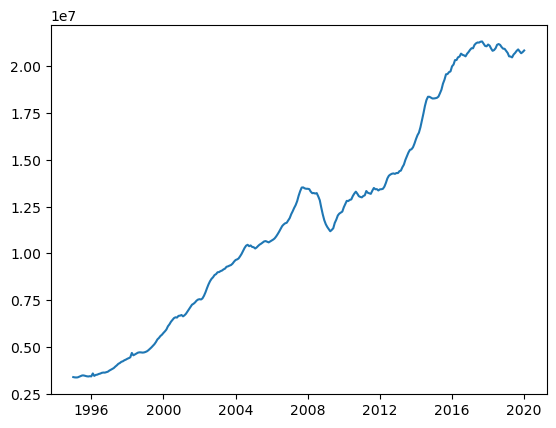

In [32]:
plt.plot(monthly_data.date.unique(), [monthly_data[monthly_data.date == monthly_data.date.unique()[i]].average_price.sum() for i in range(len(monthly_data.date.unique()))])

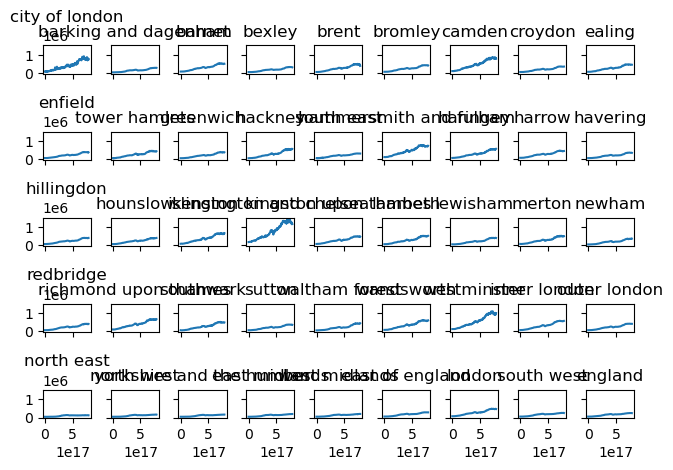

In [33]:
plot_var(monthly_data, "average_price")

visualize aggregate number of crimes committed by month

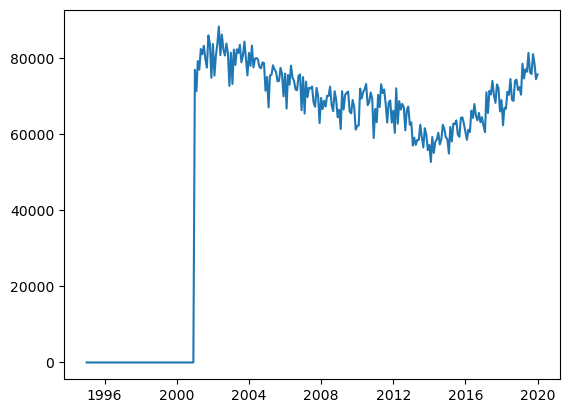

In [34]:
plt.plot(monthly_data.date.unique(), [monthly_data[monthly_data.date == monthly_data.date.unique()[i]].no_of_crimes.sum() for i in range(len(monthly_data.date.unique()))])

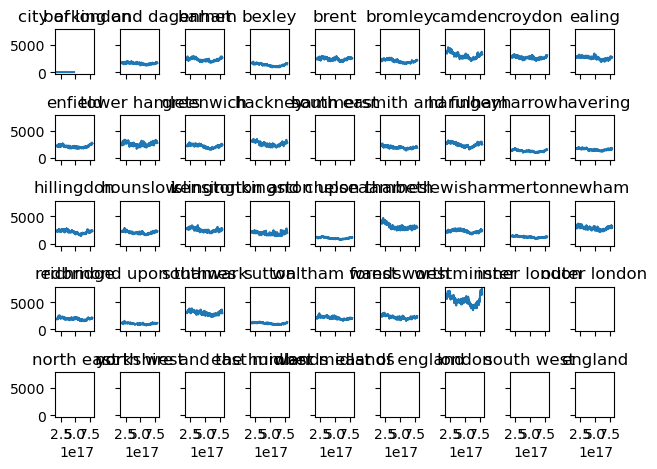

In [36]:
plot_var(monthly_data, "no_of_crimes")

#### examine yearly data

In [35]:
yearly_data

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922,0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620,3,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128,8,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386,18,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911,6,260317.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,K03000001,great britain,2019-12-01,30446.0,NaN,37603,NaN,NaN,NaN,NaN,NaN,0
1067,K04000001,england and wales,2019-12-01,30500.0,NaN,37865,NaN,NaN,NaN,NaN,NaN,0
1068,N92000002,northern ireland,2019-12-01,27434.0,NaN,32083,NaN,NaN,NaN,NaN,NaN,0
1069,S92000003,scotland,2019-12-01,30000.0,NaN,34916,NaN,NaN,NaN,NaN,NaN,0
